<a href="https://colab.research.google.com/github/MLParas/Pytorch/blob/main/1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.drop(["id","Unnamed: 32"],axis = 1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size = 0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.shape

(455, 30)

Label encoding

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

Making tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

Model building

In [ ]:
class MySimpleNN():

  def __init__(self,X):
    self.weights = torch.rand((X.shape[1],1),dtype=torch.float64,requires_grad=True)  #30x1
    self.biases  = torch.zeros(1,dtype=torch.float64,requires_grad=True) # single perceptron

  def forward(self,X):
    z = torch.matmul(X,self.weights) + self.biases
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss(self,y_pred,y):
    y_pred = torch.clip(y_pred,1e-6,1-1e-6)
    loss = -torch.mean(y*torch.log(y_pred)+(1-y)*torch.log(1-y_pred))
    return loss

  # def accuracy(self,y_pred,y):




In [ ]:
learning_rate = 0.1
epochs = 25

Model Creation

In [ ]:
model = MySimpleNN(X_train_tensor)

#Define loop
for epoch in range(epochs):
  #Forward pass
  y_pred = model.forward(X_train_tensor)
  #Loss
  loss = model.loss(y_pred,y_train_tensor)
  # print(f"Epoch:'{epoch+1} loss:{loss}")
  # Backward
  loss.backward()

  #Parameter update
  with torch.no_grad():
    model.weights-= learning_rate*model.weights.grad
    model.biases-= learning_rate*model.biases.grad

  ## Nullify the gradients
  model.weights.grad.zero_()
  model.biases.grad.zero_()

  #Print loss in each epoch
  print(f'Loss:{loss} epoch: {epoch+1}')



Loss:3.718006755440596 epoch: 1
Loss:3.6210870766571195 epoch: 2
Loss:3.5174590912442287 epoch: 3
Loss:3.407663353272194 epoch: 4
Loss:3.2916807511104165 epoch: 5
Loss:3.1704524858626986 epoch: 6
Loss:3.0459896191904545 epoch: 7
Loss:2.9148104299461917 epoch: 8
Loss:2.781671557656107 epoch: 9
Loss:2.646499598224893 epoch: 10
Loss:2.5083682103656746 epoch: 11
Loss:2.3596929001685343 epoch: 12
Loss:2.20483823730248 epoch: 13
Loss:2.0387437932094157 epoch: 14
Loss:1.8727708977078323 epoch: 15
Loss:1.7113367108196316 epoch: 16
Loss:1.5593668010844037 epoch: 17
Loss:1.4183421624307302 epoch: 18
Loss:1.284705265980641 epoch: 19
Loss:1.1645727140118376 epoch: 20
Loss:1.0623362720897824 epoch: 21
Loss:0.9773443738140364 epoch: 22
Loss:0.9117653019272945 epoch: 23
Loss:0.8634419181511681 epoch: 24
Loss:0.8291093486454757 epoch: 25


Evaluation

In [ ]:
# test data we need to turn on backprop
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred>0.85).float() # boolean to float

accuracy = (y_pred == y_test_tensor).float().mean()
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.6255770921707153


# **NEURAL NETWORK USING NN MODULE**

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self,num_features):

    super().__init__() ## some initilsations like parameters and cuda are in the nn.Module class. Some fxn might fail to run without them being created.
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,features):
    out = self.linear(features)  # Wx+b
    out = self.sigmoid(out) # y_pred

    return out


In [ ]:
# Create dummy dataset
features = torch.rand(10,5)

In [ ]:
# Create Model
model = Model(features.shape[1])

# feature they have overwrttien __call__ to call forward directly when model(features) is called
model.forward(features)

tensor([[0.4908],
        [0.5671],
        [0.5197],
        [0.6709],
        [0.5539],
        [0.6127],
        [0.5633],
        [0.5766],
        [0.5080],
        [0.5862]], grad_fn=<SigmoidBackward0>)

In [ ]:
# To check model weights and biases
model.linear.weight
model.linear.bias

Parameter containing:
tensor([-0.1065], requires_grad=True)

SyntaxError: invalid syntax (<ipython-input-50-dacdf31c6fcd>, line 1)

Cool visualisatoin libraries


In [ ]:
## To visualise a netwrok
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model,input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
!pip install torchview

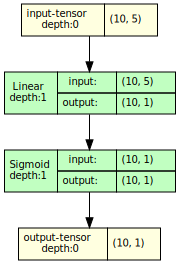

In [ ]:
from torchview import draw_graph
# Generate visualization
graph = draw_graph(model, input_size=(10, 5), expand_nested=True)
graph.visual_graph

In [ ]:
!pip install netron
import torch

# Save model
torch.save(model, "model.pth")

# Open in Netron
import netron
netron.start("model.pth")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.7 MB/s eta 0:00:00
Serving 'model.pth' at http://localhost:8081


('localhost', 8081)

More complex NN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Model(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.linear1 = nn.Linear(num_features,3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out



In [ ]:
model = Model(features.shape[1])

In [ ]:
data = torch.rand(10,5)
model(data)

tensor([[0.3985],
        [0.4186],
        [0.4186],
        [0.4186],
        [0.4156],
        [0.4200],
        [0.4223],
        [0.4278],
        [0.3944],
        [0.4111]], grad_fn=<SigmoidBackward0>)

Using Container to avoid repiritions

In [ ]:
class Model2(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.network = nn.Sequential(nn.Linear(num_features,3),nn.ReLU(),nn.Linear(3,1),nn.Sigmoid())

  def forward(self,features):
    return self.network(features)

In [ ]:
data2 = torch.rand(50,5)
model2 = Model2(data2.shape[1])
model2(data2)

tensor([[0.5477],
        [0.5477],
        [0.5717],
        [0.5683],
        [0.5739],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5799],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5643],
        [0.5477],
        [0.5603],
        [0.5477],
        [0.5477],
        [0.5480],
        [0.5553],
        [0.5477],
        [0.5501],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5484],
        [0.5477],
        [0.5750],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5921],
        [0.5477],
        [0.5603],
        [0.5477],
        [0.5477],
        [0.5694],
        [0.5477],
        [0.5662],
        [0.5584],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5477],
        [0.5582],
        [0.5477],
        [0.5477],
        [0.5491]], grad_fn=<SigmoidBackward0>)

Defining model on previous breast cancer data

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
X_test_tensor.shape

torch.Size([114, 30])

In [ ]:
class NewNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    # self.Network = nn.Sequential(nn.Linear(num_features,1),nn.Sigmoid())
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,features):
    out = self.linear(features)
    out = self.sigmoid(out)
    return out


  # def accuracy(self,y_pred,y):


In [ ]:
learning_rate = 0.1
epochs = 25

In [ ]:
X_train_tensor = X_train_tensor.to(torch.float32)


In [ ]:
model3= NewNN(X_train_tensor.shape[1])
# Loss using nn module
loss_fxn = nn.BCELoss()

In [ ]:
y_train_tensor.to(torch.float32)

tensor([1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 

In [ ]:
#Define loop
for epoch in range(epochs):
  #Forward pass
  y_pred = model3(X_train_tensor)
  #Loss
  loss =loss_fxn(y_pred,y_train_tensor.unsqueeze(1))
  model3.zero_grad()
  loss.backward()

  #Parameter update
  with torch.no_grad():
    model3.linear.weight-= learning_rate*model3.linear.weight.grad
    model3.linear.bias-= learning_rate*model3.linear.bias.grad

  ## Nullify the gradients
  model3.linear.weight.grad.zero_()
  model3.linear.bias.grad.zero_()

  #Print loss in each epoch
  print(f'Loss:{loss} epoch: {epoch+1}')

RuntimeError: Found dtype Long but expected Float

In [ ]:
import torch.nn as nn

Final NN module with nn loss and nn backprop

In [ ]:
class NN(nn.Module):
  def __init__(self,d):
    super().__init__()
    self.linear = nn.Linear(d,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,X):
    return self.sigmoid(self.linear(X))



In [ ]:
epochs = 20
lr = 0.1
loss_fxn = nn.BCELoss()
model = NN(X_train_tensor.shape[1])


In [ ]:
# model.linear.weight.shape
X_train_tensor.shape

torch.Size([455, 30])

optimiser

In [ ]:
# define optimizer

Parameter containing:
tensor([[-0.0988,  0.1067, -0.1369, -0.1231, -0.1266, -0.0748,  0.0463, -0.0623,
         -0.0031, -0.0055,  0.0696,  0.1528,  0.0237, -0.0156,  0.1529,  0.1333,
          0.0138,  0.1180, -0.0201,  0.0626,  0.0226,  0.1616,  0.0470,  0.1752,
         -0.1818, -0.0176,  0.0158,  0.1499, -0.1581,  0.1660]],
       requires_grad=True)
Parameter containing:
tensor([-0.1802], requires_grad=True)


In [ ]:
##defining optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
for epoch in range(epochs):
  y_pred = model(X_train_tensor)
  loss = loss_fxn(y_pred,y_train_tensor.view(-1,1))

  ## clear gradients
  optimizer.zero_grad()
  loss.backward()
  ## grad updates
  optimizer.step()
  print(f"Epoch:{epoch+1}loss:{loss}")


Epoch:1loss:0.19111545383930206
Epoch:2loss:0.18722905218601227
Epoch:3loss:0.18361671268939972
Epoch:4loss:0.18025003373622894
Epoch:5loss:0.1771044284105301
Epoch:6loss:0.17415834963321686
Epoch:7loss:0.17139297723770142
Epoch:8loss:0.16879166662693024
Epoch:9loss:0.16633981466293335
Epoch:10loss:0.16402436792850494
Epoch:11loss:0.1618337631225586
Epoch:12loss:0.15975768864154816
Epoch:13loss:0.15778698027133942
Epoch:14loss:0.1559133380651474
Epoch:15loss:0.15412934124469757
Epoch:16loss:0.15242831408977509
Epoch:17loss:0.15080420672893524
Epoch:18loss:0.14925159513950348
Epoch:19loss:0.14776548743247986
Epoch:20loss:0.1463414430618286


Eval

In [ ]:
with torch.no_grad():
  y_pred = model(X_test_tensor)
  y_pred = (y_pred>0.5).float()
  acc = (y_pred == y_test_tensor).float().mean()
  print(acc)

tensor(0.5118)
